In [ ]:
import os

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/dogs-vs-cats-mvml-2020')

Skipping, found downloaded files in "./dogs-vs-cats-mvml-2020" (use force=True to force download)


In [ ]:
os.listdir('dogs-vs-cats-mvml-2020')

['cats_vs_dogs', 'test']

In [ ]:
len(os.listdir('/content/dogs-vs-cats-mvml-2020/cats_vs_dogs/cats_vs_dogs'))

18752

In [ ]:
file_list=list(os.listdir('/content/dogs-vs-cats-mvml-2020/cats_vs_dogs/cats_vs_dogs'))

In [ ]:
file_list[:10]

['dog.2373.jpg',
 'cat.5662.jpg',
 'dog.11957.jpg',
 'dog.7016.jpg',
 'cat.10988.jpg',
 'dog.3852.jpg',
 'cat.5808.jpg',
 'cat.1073.jpg',
 'dog.10621.jpg',
 'dog.6140.jpg']

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from google.colab.patches import cv2_imshow

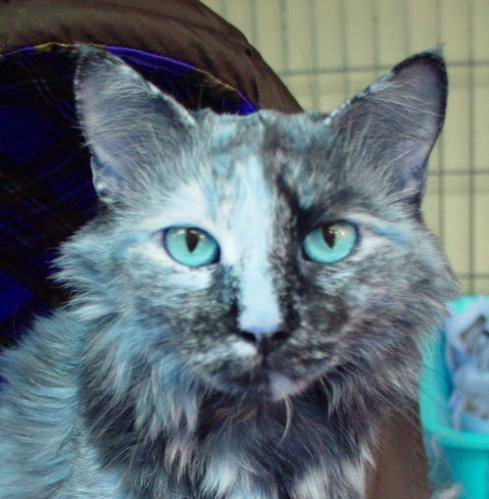

In [ ]:
img=mpimg.imread('/content/dogs-vs-cats-mvml-2020/cats_vs_dogs/cats_vs_dogs/cat.10.jpg')
cv2_imshow(img)

In [ ]:
c=0
d=0
for i in range(len(file_list)):
  if 'cat' in file_list[i]:
    c+=1
  if 'dog' in file_list[i]:
    d+=1

In [ ]:
c

9376

In [ ]:
d

9376

In [ ]:
os.mkdir('/content/img_resized')

FileExistsError: [Errno 17] File exists: '/content/img_resized'

In [ ]:
org='/content/dogs-vs-cats-mvml-2020/cats_vs_dogs/cats_vs_dogs'
re='/content/img_resized'
for i in range(len(file_list)):
  file_name=os.listdir(org)[i]
  img_path=org+'/'+file_name
  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')
  img.save(file_name)

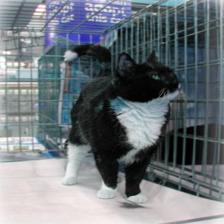

In [ ]:
img=mpimg.imread('/content/cat.10024.jpg')
cv2_imshow(img)

In [ ]:
labels=[]
for i in range(2000):
  if 'cat' in file_list[i]:
    labels.append(0)
  if 'dog' in file_list[i]:
    labels.append(1)

In [ ]:
labels[:10]

[1, 0, 1, 1, 0, 1, 0, 0, 1, 1]

In [ ]:
file_list[:10]

['dog.2373.jpg',
 'cat.5662.jpg',
 'dog.11957.jpg',
 'dog.7016.jpg',
 'cat.10988.jpg',
 'dog.3852.jpg',
 'cat.5808.jpg',
 'cat.1073.jpg',
 'dog.10621.jpg',
 'dog.6140.jpg']

In [ ]:
import cv2
import glob

In [ ]:
img_di='/content/'
files=[]
[files.extend(glob.glob(img_di+'/*.jpg'))]
dog_cat_images = np.asarray([img for img in (cv2.imread(file) for file in files) if img is not None])

In [ ]:
dog_cat_images=dog_cat_images[:2000]

In [ ]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [ ]:
x=dog_cat_images
y=labels

array([[[163, 136, 102],
        [165, 138, 104],
        [164, 137, 103],
        ...,
        [122, 120,  85],
        [124, 122,  87],
        [130, 130,  94]],

       [[163, 136, 102],
        [166, 139, 105],
        [166, 139, 105],
        ...,
        [127, 123,  88],
        [122, 120,  85],
        [125, 125,  89]],

       [[164, 137, 103],
        [167, 140, 106],
        [168, 141, 107],
        ...,
        [125, 120,  87],
        [114, 109,  76],
        [112, 110,  76]],

       ...,

       [[ 47,  81,  51],
        [ 36,  70,  39],
        [ 17,  51,  20],
        ...,
        [ 41,  63,  39],
        [ 38,  57,  36],
        [ 29,  48,  27]],

       [[ 42,  76,  46],
        [ 48,  82,  51],
        [ 37,  71,  40],
        ...,
        [ 39,  61,  37],
        [ 36,  55,  34],
        [ 32,  48,  30]],

       [[ 21,  55,  25],
        [ 46,  80,  49],
        [ 49,  83,  52],
        ...,
        [ 36,  58,  34],
        [ 37,  54,  33],
        [ 34,  50,  32]]], dtype=uint8)
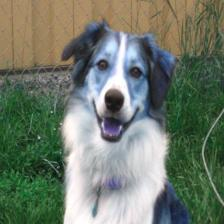

In [ ]:
x[0]

In [ ]:
len(x)

2000

In [ ]:
y[:10]

[1, 0, 1, 1, 0, 1, 0, 0, 1, 1]

In [ ]:
len(y)

2000

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
x_train.shape

(1600, 224, 224, 3)

array([[[212, 225, 223],
        [212, 225, 223],
        [213, 226, 224],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[212, 225, 223],
        [212, 225, 223],
        [213, 226, 224],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[212, 225, 223],
        [213, 226, 224],
        [213, 226, 224],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[164, 176, 180],
        [182, 194, 198],
        [195, 207, 211],
        ...,
        [ 65,  73,  96],
        [ 51,  59,  82],
        [ 61,  69,  92]],

       [[176, 187, 191],
        [176, 187, 191],
        [178, 189, 193],
        ...,
        [ 59,  70,  92],
        [ 47,  58,  80],
        [ 66,  77,  99]],

       [[193, 204, 208],
        [168, 179, 183],
        [155, 166, 170],
        ...,
        [ 57,  68,  90],
        [ 45,  56,  78],
        [ 68,  79, 101]]], dtype=uint8)
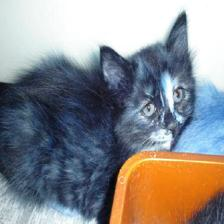

In [ ]:
x_test[0]

In [ ]:
len(x_train)

1600

In [ ]:
len(y_train)

1600

In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
!pip install tf_keras
import keras

In [ ]:
import tf_keras

In [ ]:
pretrained_model=hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape=(224,224,3), trainable=False)

In [ ]:
model=tf_keras.Sequential([
    pretrained_model,
    tf_keras.layers.Dense(2)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [ ]:
x_train_scaled[0]

array([[[0.24313725, 0.25490196, 0.21960784],
        [0.29411765, 0.30588235, 0.27058824],
        [0.30196078, 0.31372549, 0.27843137],
        ...,
        [0.42745098, 0.55686275, 0.65882353],
        [0.42352941, 0.55686275, 0.67058824],
        [0.42352941, 0.55686275, 0.67058824]],

       [[0.2745098 , 0.28627451, 0.25098039],
        [0.29411765, 0.30588235, 0.27058824],
        [0.30588235, 0.31764706, 0.28235294],
        ...,
        [0.41176471, 0.54117647, 0.64313725],
        [0.4       , 0.53333333, 0.64705882],
        [0.39607843, 0.52941176, 0.64313725]],

       [[0.29803922, 0.30980392, 0.2745098 ],
        [0.29019608, 0.30196078, 0.26666667],
        [0.30588235, 0.31764706, 0.28235294],
        ...,
        [0.40392157, 0.53333333, 0.63529412],
        [0.38823529, 0.52156863, 0.63529412],
        [0.37647059, 0.50980392, 0.62352941]],

       ...,

       [[0.2745098 , 0.25882353, 0.23921569],
        [0.29019608, 0.2745098 , 0.25490196],
        [0.30588235, 0

In [ ]:
y_train = np.array(y_train)

In [ ]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 72s 1s/step - loss: 0.1587 - acc: 0.9419
Epoch 2/5
50/50 [==============================] - 63s 1s/step - loss: 0.0605 - acc: 0.9819
Epoch 3/5
50/50 [==============================] - 58s 1s/step - loss: 0.0446 - acc: 0.9881
Epoch 4/5
50/50 [==============================] - 66s 1s/step - loss: 0.0344 - acc: 0.9925
Epoch 5/5
50/50 [==============================] - 69s 1s/step - loss: 0.0266 - acc: 0.9950


In [ ]:
y_test=np.array(y_test)

In [ ]:
model.evaluate(x_test_scaled,y_test)

13/13 [==============================] - 18s 1s/step - loss: 0.0697 - acc: 0.9750


[0.06965306401252747, 0.9750000238418579]

In [ ]:
l=[]

In [ ]:
test_files=os.listdir('/content/dogs-vs-cats-mvml-2020/test/test')

In [ ]:
def input_img_fun(input_img_path):
  input_img=cv2.imread(input_img_path)
  input_img_resized=cv2.resize(input_img,(224,224))
  input_img_scaled=input_img_resized/255.0
  img_reshaped=np.reshape(input_img_scaled,[1,224,224,3])
  preds=model.predict(img_reshaped)
  pred_label=np.argmax(preds)
  print(pred_label)
  l.append(pred_label)

In [ ]:
test_files[0]

'2535.jpg'

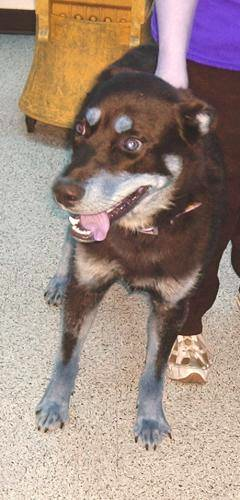

In [ ]:
img=mpimg.imread('/content/dogs-vs-cats-mvml-2020/test/test/10001.jpg')
cv2_imshow(img)

In [ ]:
len(test_files)

6248

In [ ]:
input_img_fun('/content/dogs-vs-cats-mvml-2020/test/test/10001.jpg')

1/1 [==============================] - 0s 56ms/step
1


In [ ]:
for i in range(len(test_files)):
  print(input_img_fun('/content/dogs-vs-cats-mvml-2020/test/test/'+test_files[i]))

Streaming output truncated to the last 5000 lines.
1
None
1/1 [==============================] - 0s 118ms/step
0
None
1/1 [==============================] - 0s 107ms/step
1
None
1/1 [==============================] - 0s 130ms/step
1
None
1/1 [==============================] - 0s 146ms/step
1
None
1/1 [==============================] - 0s 115ms/step
0
None
1/1 [==============================] - 0s 78ms/step
1
None
1/1 [==============================] - 0s 81ms/step
1
None
1/1 [==============================] - 0s 126ms/step
1
None
1/1 [==============================] - 0s 129ms/step
0
None
1/1 [==============================] - 0s 98ms/step
0
None
1/1 [==============================] - 0s 127ms/step
0
None
1/1 [==============================] - 0s 100ms/step
0
None
1/1 [==============================] - 0s 146ms/step
1
None
1/1 [==============================] - 0s 115ms/step
1
None
1/1 [==============================] - 0s 127ms/step
1
None
1/1 [==============================] - 0s 142

In [ ]:
l

[0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,


In [ ]:
len(l)

6466

In [ ]:
l=l[217:]

In [ ]:
len(l)

6249

In [ ]:
l=l[1:]

In [ ]:
len(l)

6248

In [ ]:
sub=pd.DataFrame(l)

In [ ]:
sub.columns=['LABEL']

In [ ]:
sub.index.name='ID'

In [ ]:
sub

,LABEL
ID,
0,0
1,1
2,0
3,0
4,0
...,...
6243,0
6244,0
6245,1


In [ ]:
list_files=os.listdir('/content/dogs-vs-cats-mvml-2020/test/test')

In [ ]:
l1=[]
for i in range(len(list_files)):
  l1.append(list_files[i].split('.')[0])

In [ ]:
l1

['2535',
 '3350',
 '2202',
 '9048',
 '1666',
 '3732',
 '11827',
 '4536',
 '9731',
 '1687',
 '3358',
 '7203',
 '2676',
 '4504',
 '4714',
 '1741',
 '9300',
 '9200',
 '10777',
 '11080',
 '1945',
 '8896',
 '6201',
 '7628',
 '6619',
 '6252',
 '6908',
 '3756',
 '1820',
 '6542',
 '4206',
 '7216',
 '11983',
 '5632',
 '7495',
 '6777',
 '5280',
 '10300',
 '9994',
 '2739',
 '6927',
 '4875',
 '8089',
 '4830',
 '4721',
 '8278',
 '1044',
 '3596',
 '2532',
 '2561',
 '5483',
 '8132',
 '10349',
 '4663',
 '1667',
 '6580',
 '259',
 '4580',
 '3852',
 '6935',
 '5975',
 '9097',
 '742',
 '11145',
 '11816',
 '12323',
 '6454',
 '9935',
 '10711',
 '4782',
 '8588',
 '3070',
 '9768',
 '12107',
 '1505',
 '11763',
 '7975',
 '961',
 '4817',
 '11884',
 '8390',
 '2309',
 '1',
 '11463',
 '4780',
 '6392',
 '10013',
 '9690',
 '1467',
 '7533',
 '11822',
 '12319',
 '3602',
 '11588',
 '6855',
 '3804',
 '2415',
 '11424',
 '3066',
 '4586',
 '854',
 '10821',
 '9542',
 '7131',
 '5484',
 '482',
 '11856',
 '3032',
 '7231',
 '1048

In [ ]:
sub['ID']=l1

In [ ]:
sub = sub.reset_index(drop=True)

In [ ]:
sub = sub.set_index('ID')

In [ ]:
sub

,LABEL
ID,
2535,0
3350,1
2202,0
9048,0
1666,0
...,...
12345,0
9406,0
4856,1


In [ ]:
sub.to_csv('/content/img_resized/submission.csv')